In [1]:
!pip install -q -U google-generativeai

In [3]:
import pathlib
import textwrap

import google.generativeai as genai
# Used to securely store your API key
from google.colab import userdata
from IPython.display import display
from IPython.display import Markdown
def to_markdown (text):
  text =text.replace('.', '*')
  return Markdown (textwrap.indent(text, '>', predicate =lambda _: True))


In [ ]:
import os
os.environ['GOOGLE_API_KEY']="ENTER YOUR API KEY"

In [5]:
genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

In [6]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924


In [11]:
model=genai.GenerativeModel('gemini-1.0-pro')

In [12]:
model

genai.GenerativeModel(
    model_name='models/gemini-1.0-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [13]:
%%time
response=model.generate_content("what is the meaning of life?")

CPU times: user 121 ms, sys: 10.4 ms, total: 131 ms
Wall time: 11.2 s


In [14]:
to_markdown(response.text)

>**Philosophical Perspectives:**
>
>* **Existentialism:** There is no inherent meaning; individuals create their own through their actions and experiences*
>* **Absurdism:** Life is fundamentally meaningless, but we can find purpose in accepting and embracing the absurdity*
>* **Nihilism:** Life is devoid of inherent purpose or value*
>* **Existential Humanism:** Meaning is derived from personal values, relationships, and contributions to society*
>* **Stoicism:** Aim for a virtuous life, accepting both joys and hardships as part of the natural order*
>
>**Religious Perspectives:**
>
>* **Theism:** Life's meaning is derived from God's plan or purpose for us*
>* **Atheism:** Meaning is found in human connections, pursuit of knowledge, and making a positive impact on the world*
>* **Agnosticism:** The meaning of life is unknowable or uncertain*
>
>**Scientific Perspectives:**
>
>* **Biology:** Life's purpose is to survive, reproduce, and pass on genes to future generations*
>* **Evolutionary Psychology:** Meaning is derived from achieving goals that contribute to reproductive success*
>* **Emergence:** Meaning is an emergent property that arises from complex interactions within a system*
>
>**Personal Perspectives:**
>
>* **Relationships:** Meaning is found in connections with loved ones, family, and community*
>* **Work:** Meaning is derived from contributing to a larger purpose or making a difference through work*
>* **Hobbies and Interests:** Meaning can be found in activities that bring joy, fulfillment, or a sense of accomplishment*
>* **Self-Actualization:** Meaning is derived from reaching one's full potential and living an authentic life*
>* **Legacy:** Creating a lasting impact or leaving something behind that carries personal significance*
>
>**Conclusion:**
>
>The meaning of life is highly subjective and multifaceted* It can be influenced by our personal values, experiences, beliefs, and the society we live in* Ultimately, the quest for meaning is an ongoing journey of introspection, exploration, and discovering what resonates with our hearts and minds*

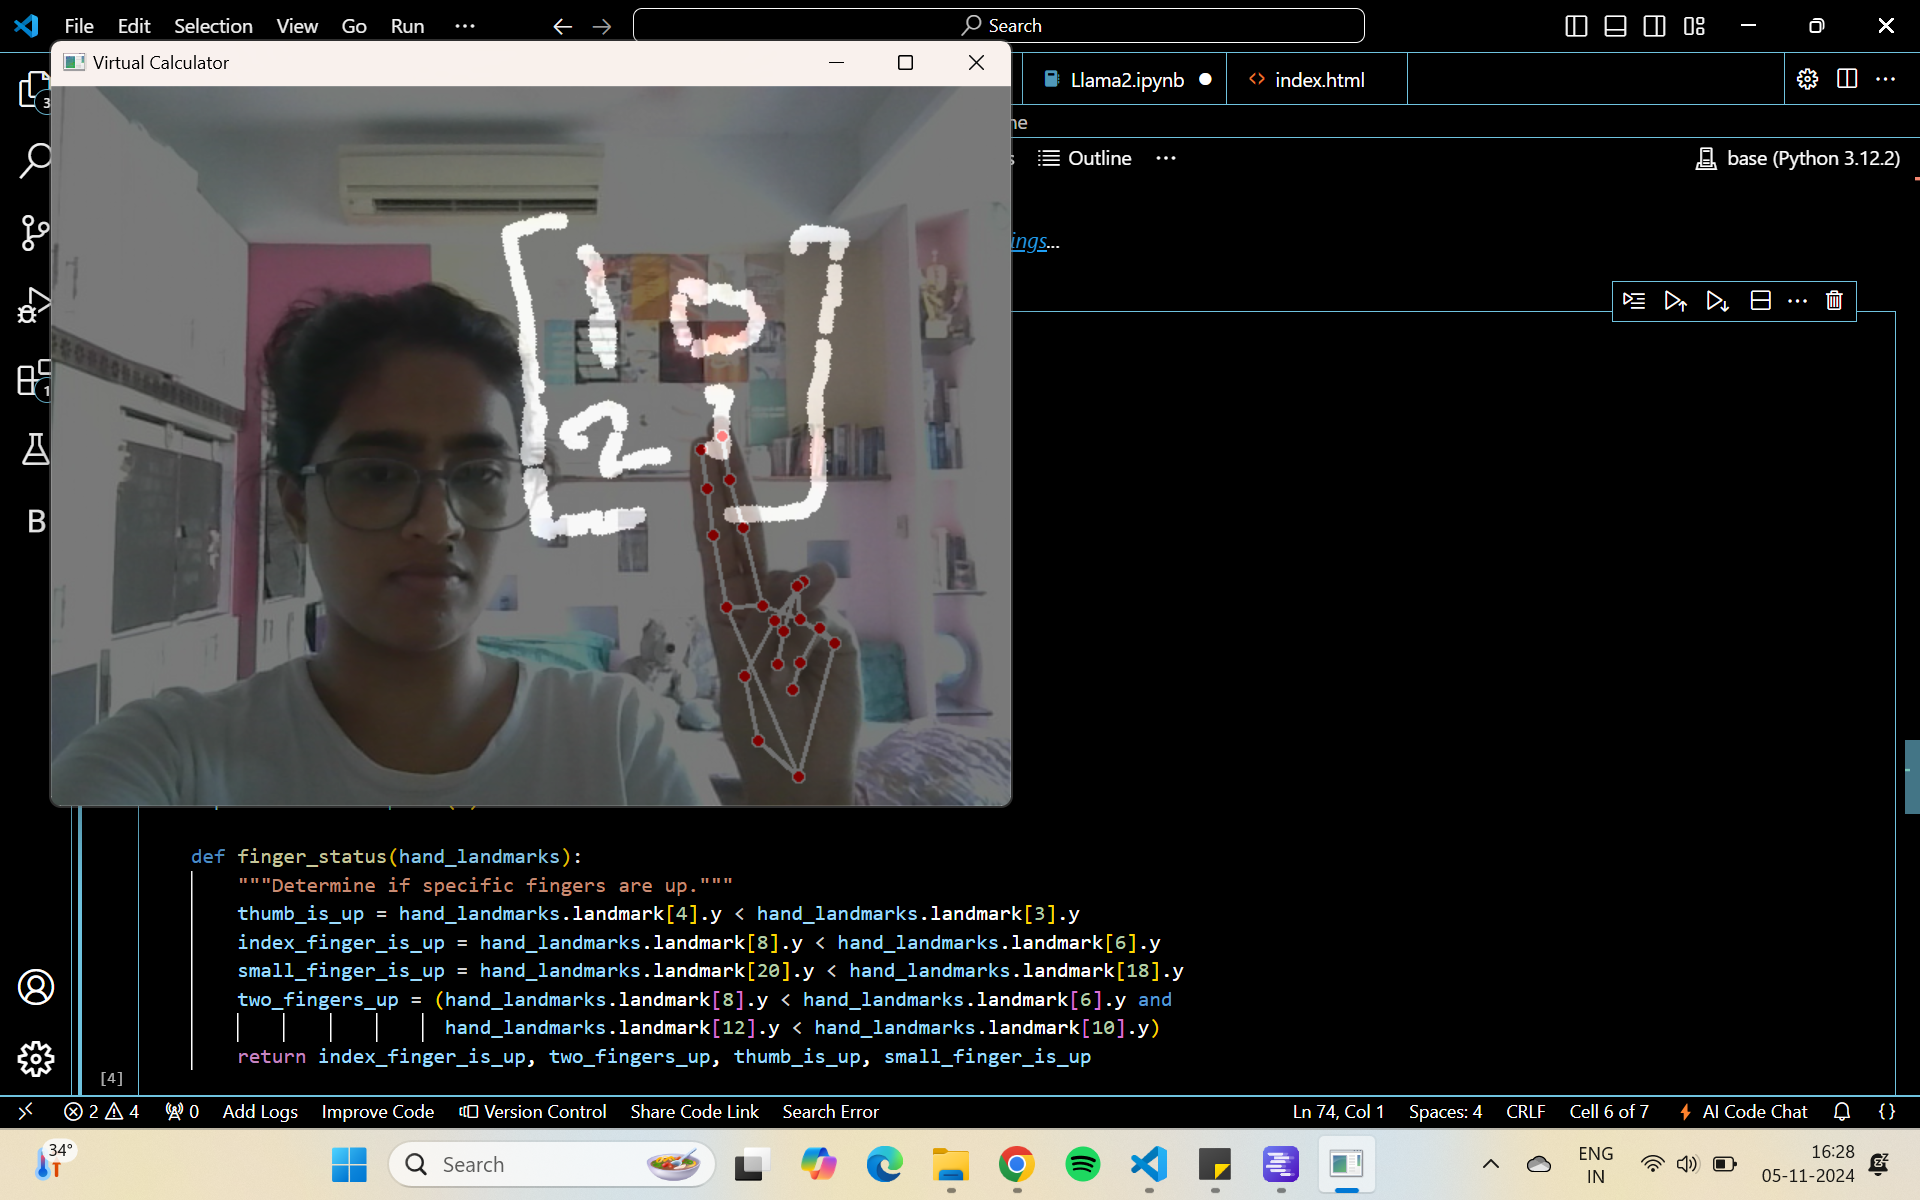

In [16]:
import PIL.Image
img=PIL.Image.open('/content/Screenshot (583).png')
img

In [19]:
model=genai.GenerativeModel('models/gemini-1.5-flash')

In [20]:
response=model.generate_content(img)
to_markdown(response.text)

>The image shows a person in front of a computer screen* The person is making a hand gesture in front of a webcam* The webcam feed is shown on the screen, and the hand gesture is being analyzed by a Python script* The script uses the hand landmarks detected by the webcam to determine which fingers are up* The output of the script is shown in the code editor on the right side of the screen* The person seems to be using the hand gesture to control a virtual calculator*

In [22]:
response=model.generate_content(["Solve the rank of the matrix drawn in the image and share the answer",img],stream=True)
response.resolve()
to_markdown(response.text)

>The rank of the matrix  
>[1 0]
>[2 1] 
>is 2*
>
>The rank of a matrix is the number of linearly independent rows or columns* In this case, both rows are linearly independent, meaning that neither row can be expressed as a linear combination of the other row* Therefore, the rank of the matrix is 2* 
